In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns


D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# A). Retrieving and Preparing the Data

### 1. Reading the dataset

In [2]:

df = pd.read_csv('Glass_Identification.csv',header=None)

### 2.  The dataset shape

The dataset contains 214 rows and 11 Columns.

In [3]:
df.shape

(214, 11)

### 3. Assigning column names

As the dataset has no column names so the column names are assigned.  

In [4]:
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
df.columns = column_names

### 4. Data Check

First few rows are printed to see if the dataset is loaded correctly

In [5]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
type_mapping = {
    1: 'building_windows_float_processed',
    2: 'building_windows_non_float_processed',
    3: 'vehicle_windows_float_processed',
    4: 'vehicle_windows_non_float_processed',
    5: 'containers',
    6: 'tableware',
    7: 'headlamps'
}


df['Type'] = df['Type'].map(type_mapping)


df.head()


,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


In [7]:
df['Type'].unique()

array(['building_windows_float_processed',
       'building_windows_non_float_processed',
       'vehicle_windows_float_processed', 'containers', 'tableware',
       'headlamps'], dtype=object)

### 5. Dropping the 'ID' column

As the 'ID' Column is mere for recording the number of observation so this column is not useful for model building hence 
dropping that column

In [8]:
df.drop('Id', axis=1, inplace=True)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,building_windows_float_processed


### 6. Datatype check

The data types for each column is checked to make sure the values stored in the columns are stored in correct data type.

In [9]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type     object
dtype: object

### 7. Checking for the null values.

Making sure the data set is free from any null values.

In [10]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

### 8.Checking for the outliers using the boxplot

This below code generates a series of boxplots to visually identify outliers in the columns of a DataFrame. Each subplot is titled with the corresponding column name. The combined plots are displayed showing the data distribution and outliers in each specified column.

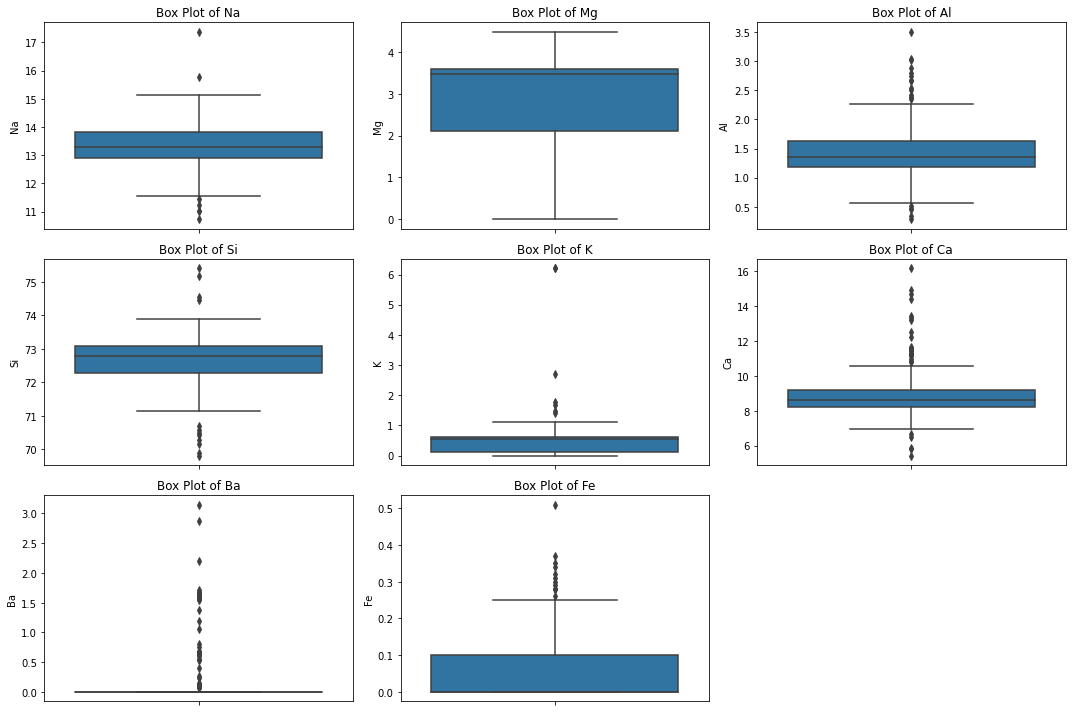

In [11]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[1:9], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

##### Analysis of Each Boxplot:
    

'Na' Plot: The data has a wider IQR with fewer outliers.

'Mg' Plot: The data has a wider IQR and a symmetrical distribution with no apparent outliers.

'Al' Plot: The data has Narrow IQR with several outliers above the upper whisker. 

'Si' Plot: The data has Wider IQR with outliers both above and below the whiskers.

'K'  Plot: The data has Very narrow IQR with several outliers on both sides, indicating a concentrated distribution with many deviations.

'Ca' Plot: The data has narrow IQR plots with many outliers above the upper whisker.

'Ba' Plot: The data has Very narrow IQR with a significant number of outliers, indicating a dense central distribution.

'Fe' Plot: The data has Wider IQR with some outliers, showing a relatively more spread distribution compared to others in this row.

### 9. Removing the outliers

We will be Removing outliers from the 'K' (Potassium) and 'Na' (Sodium) columns in the Glass Identification dataset beacuase of following reasons. 

Firstly, outliers can disproportionately influence certain machine learning algorithms, leading to biased models and poor generalization to new data. Algorithms that rely on distance calculations, such as K-Nearest Neighbors, can be particularly affected by these extreme values, distorting distance metrics and compromising model accuracy. 

Secondly, extreme values in 'K' and 'Na' may result from data entry errors, measurement errors, or other anomalies. 

Thirdly, outliers can skew summary statistics like the mean and standard deviation, leading to misleading interpretations.


Morover 'Ba' has Significant number of outliers but These outliers might be genuine variations in the glass samples.It is also important to consider that these outliers might represent genuine variations in the glass samples. Different types of glass can have significantly different compositions, and what might appear as an outlier could actually be a characteristic of a specific type of glass.

In [12]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df = remove_outliers_iqr(df, 'K')
df = remove_outliers_iqr(df, 'Na')
print(f"New shape after removing outliers from 'K' and 'Na': {df.shape}")

New shape after removing outliers from 'K' and 'Na': (200, 10)


# B). Data Exploration

### 1. Bar Plot of Type Counts

Bar plot shows the number of each type of glass. We can see in our dataset that type '2' has the highest number of observation followed by type '1'

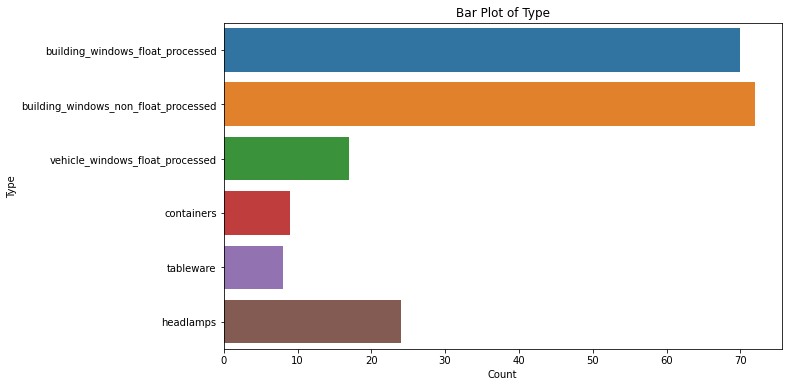

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Type'], orient='h')  
plt.title('Bar Plot of Type')
plt.ylabel('Type')
plt.xlabel('Count')
plt.show()

### 2. Statistics for each column

In [14]:
# Statistics for each column
statistics = df.describe().T  # Transpose for easier reading
statistics['median'] = df.median()
statistics['std_dev'] = df.std()
statistics['skewness'] = df.skew()
statistics['kurtosis'] = df.kurtosis()
statistics


C:\Users\Dell\AppData\Local\Temp\ipykernel_21004\222313000.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  statistics['median'] = df.median()
C:\Users\Dell\AppData\Local\Temp\ipykernel_21004\222313000.py:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  statistics['std_dev'] = df.std()
C:\Users\Dell\AppData\Local\Temp\ipykernel_21004\222313000.py:5: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is depr

,count,mean,std,min,25%,50%,75%,max,median,std_dev,skewness,kurtosis
RI,200.0,1.518289,0.002652,1.51215,1.51655,1.51767,1.519095,1.53393,1.51767,0.002652,1.930253,6.840573
Na,200.0,13.431350,0.667592,11.56000,12.93000,13.30500,13.802500,15.15000,13.30500,0.667592,0.599082,0.007323
Mg,200.0,2.809050,1.368925,0.00000,2.71750,3.49500,3.610000,4.49000,3.49500,1.368925,-1.373574,0.201135
Al,200.0,1.419500,0.448156,0.29000,1.19000,1.36000,1.612500,2.88000,1.36000,0.448156,0.637741,1.273179
Si,200.0,72.682800,0.638240,70.16000,72.33000,72.79000,73.082500,74.55000,72.79000,0.638240,-0.817624,2.112277
K,200.0,0.413300,0.259745,0.00000,0.12000,0.55000,0.600000,1.10000,0.55000,0.259745,-0.458726,-1.109852
Ca,200.0,8.936750,1.157259,7.08000,8.27750,8.60000,9.142500,16.19000,8.60000,1.157259,2.708833,10.720738
Ba,200.0,0.123650,0.362892,0.00000,0.00000,0.00000,0.000000,1.71000,0.00000,0.362892,3.268162,10.033998
Fe,200.0,0.057900,0.096505,0.00000,0.00000,0.00000,0.100000,0.51000,0.00000,0.096505,1.728050,2.708978


Explaination of the summary statistics:-

1. **Central Tendency and Spread**:
   - Most features exhibit central tendency measures like mean and median that are close, indicating relatively symmetric distributions. For instance, RI (refractive index) has a mean of 1.51 and a median of 1.51, suggesting a symmetric distribution.

2. **Skewness**:
   - Features such as Mg (-1.37) and K (-0.45) have negative skewness, suggesting a left-skewed distribution where most values are concentrated on the higher end.
   - Conversely, Ba (3.26), Ca (2.7), and Fe (1.72) exhibit positive skewness, indicating right-skewed distributions.
3. **Kurtosis**:
   - High kurtosis values for Ba (10.03) and Ca (10.72) suggest that these features have distributions with heavy tails and potential outliers.
   - Features like Si (2.11) also show moderate kurtosis, hinting at moderately heavy tails.

4. **Interquartile Range (IQR)**:
   - The IQR values indicate the range within which the middle 50% of the data lie. For example, the IQR for Si is narrow (72.330 to 73.08), suggesting low variability within the central portion of the data.
   - Conversely, Ca's IQR (8.277 to 9.14) is broader, indicating greater variability in the middle 50% of its distribution.


### 3. Visualization for each column

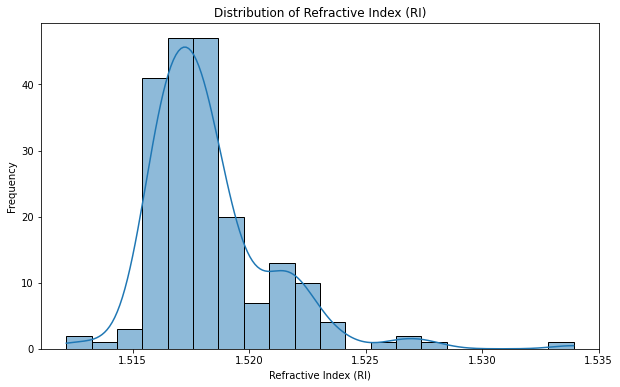

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RI'], bins=20, kde=True)
plt.title('Distribution of Refractive Index (RI)')
plt.xlabel('Refractive Index (RI)')
plt.ylabel('Frequency')
plt.show()

**RI Column**:
Mean and Median are very close, indicating a symmetric distribution.
Standard Deviation and Variance are low, indicating that the data points are closely clustered around the mean.
Skewness of 1.93 suggests a right-skewed distribution.



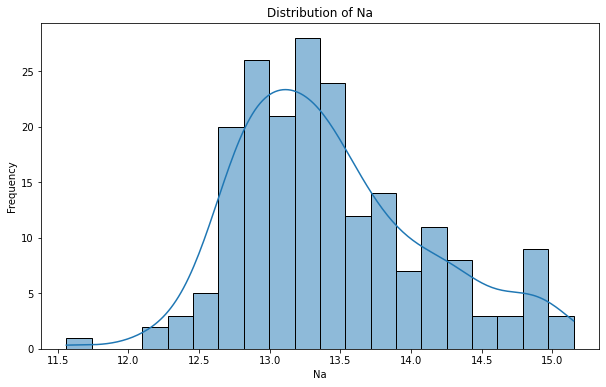

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Na'], bins=20, kde=True)
plt.title('Distribution of Na')
plt.xlabel('Na')
plt.ylabel('Frequency')
plt.show()

**Na Column**:

The 'Na' column in the Glass Identification dataset has a mean of 13.43 and a median of 13.30, indicating slight symmetry with a slight right skew. The standard deviation of 0.66 shows moderate variability. Sodium content ranges from 11.56 to 15.15. The interquartile range (12.93 to 13.80) indicates a tightly clustered middle 50% of data.

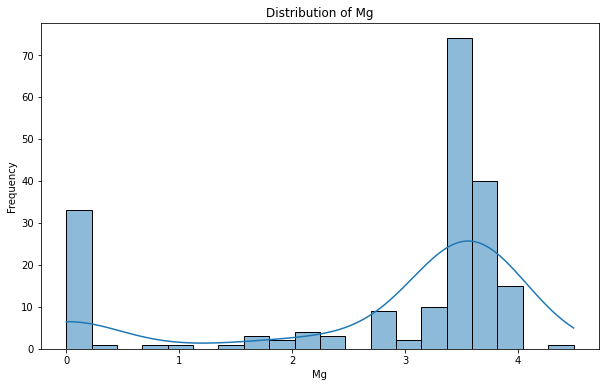

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mg'], bins=20, kde=True)
plt.title('Distribution of Mg')
plt.xlabel('Mg')
plt.ylabel('Frequency')
plt.show()

**Mg Column**:

The 'Mg' column in the Glass Identification dataset has 200 entries with a mean of 2.80 and a median of 3.49, indicating a left-skewed distribution (skewness of -1.226). The standard deviation is 1.36, showing significant variability. Values range from 0 to 4.49, with the middle 50% (interquartile range) falling between 2.717 and 3.610. 

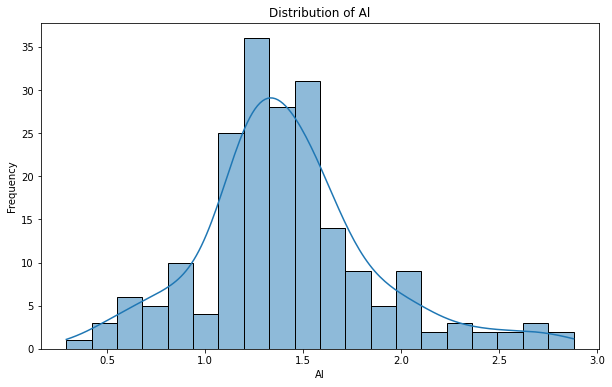

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Al'], bins=20, kde=True)
plt.title('Distribution of Al')
plt.xlabel('Al')
plt.ylabel('Frequency')
plt.show()

**Al Column**:

The 'Al' column in the Glass Identification dataset has 200 entries, with a mean of 1.41 and a median of 1.360, indicating a slightly right-skewed distribution (skewness of 0.553). The standard deviation is 0.448, showing moderate variability. Values range from 0.29 to 2.88, with the middle 50% (interquartile range) falling between 1.19 and 1.61. 

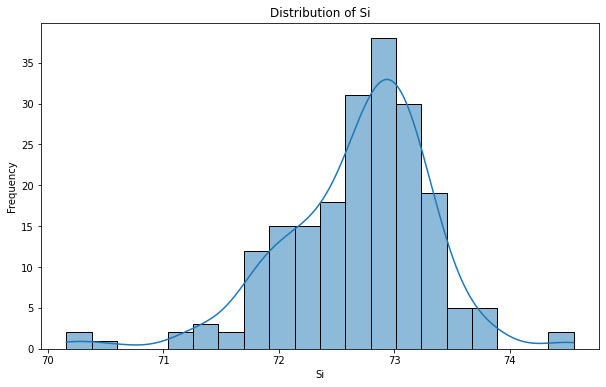

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Si'], bins=20, kde=True)
plt.title('Distribution of Si')
plt.xlabel('Si')
plt.ylabel('Frequency')
plt.show()

**Si Column**

The 'Si' column in the Glass Identification dataset has 200 entries, with a mean of 72.68 and a median of 72.79, indicating a slightly left-skewed distribution (skewness of -0.817). The standard deviation is 0.63, showing low variability. Values range from 70.16 to 74.55, with the middle 50% (interquartile range) falling between 72.33 and 73.08.

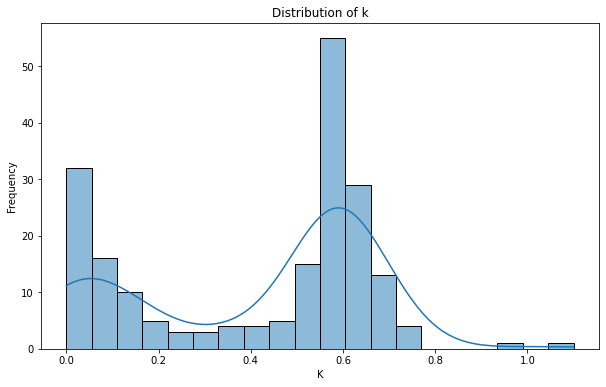

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['K'], bins=20, kde=True)
plt.title('Distribution of k')
plt.xlabel('K')
plt.ylabel('Frequency')
plt.show()

**K Column**

The 'K' column in the Glass Identification dataset has 200 entries, with a mean of 0.41 and a median of 0.55, indicating a left-skewed distribution (skewness of -0.45). The standard deviation is 0.25, showing moderate variability. Values range from 0 to 1.10, with the middle 50% (interquartile range) falling between 0.12 and 0.55.

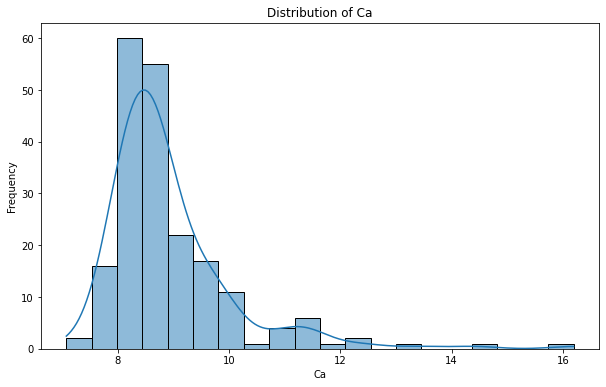

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Ca'], bins=20, kde=True)
plt.title('Distribution of Ca')
plt.xlabel('Ca')
plt.ylabel('Frequency')
plt.show()

**Ca Column**

The 'Ca' column in the Glass Identification dataset has 200 entries, with a mean of 8.93 and a median of 8.60, indicating a right-skewed distribution (skewness of 2.70). The standard deviation is 1.15, showing substantial variability. Values range from 7.08 to 16.19, with the middle 50% (interquartile range) falling between 8.27 and 9.14. 

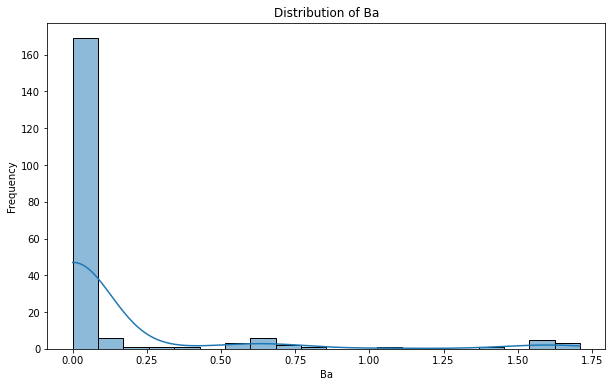

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Ba'], bins=20, kde=True)
plt.title('Distribution of Ba')
plt.xlabel('Ba')
plt.ylabel('Frequency')
plt.show()

**Ba Column**:

The 'Ba' column in the Glass Identification dataset has 200 entries, with a mean of 0.12 and a median of 0.000, indicating a highly right-skewed distribution (skewness of 3.26). The standard deviation is 0.36, showing high variability relative to the mean. Values range from 0 to 1.71.

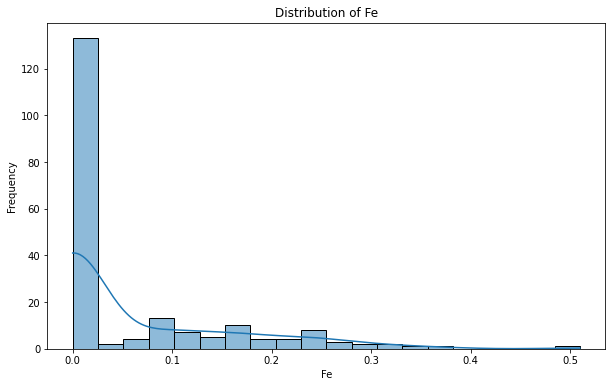

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fe'], bins=20, kde=True)
plt.title('Distribution of Fe')
plt.xlabel('Fe')
plt.ylabel('Frequency')
plt.show()

**Fe COlumn**:

The 'Fe' column in the Glass Identification dataset has 200 entries, with a mean of 0.057 and a median of 0.000, indicating a highly right-skewed distribution (skewness of 1.72). The standard deviation is 0.09, showing considerable variability relative to the mean. Values range from 0 to 0.51, with the middle 50% (interquartile range) entirely at 0, indicating that many samples have no iron content. 

### 4. Relationship between all pairs of attributes w.r.t hypothesis

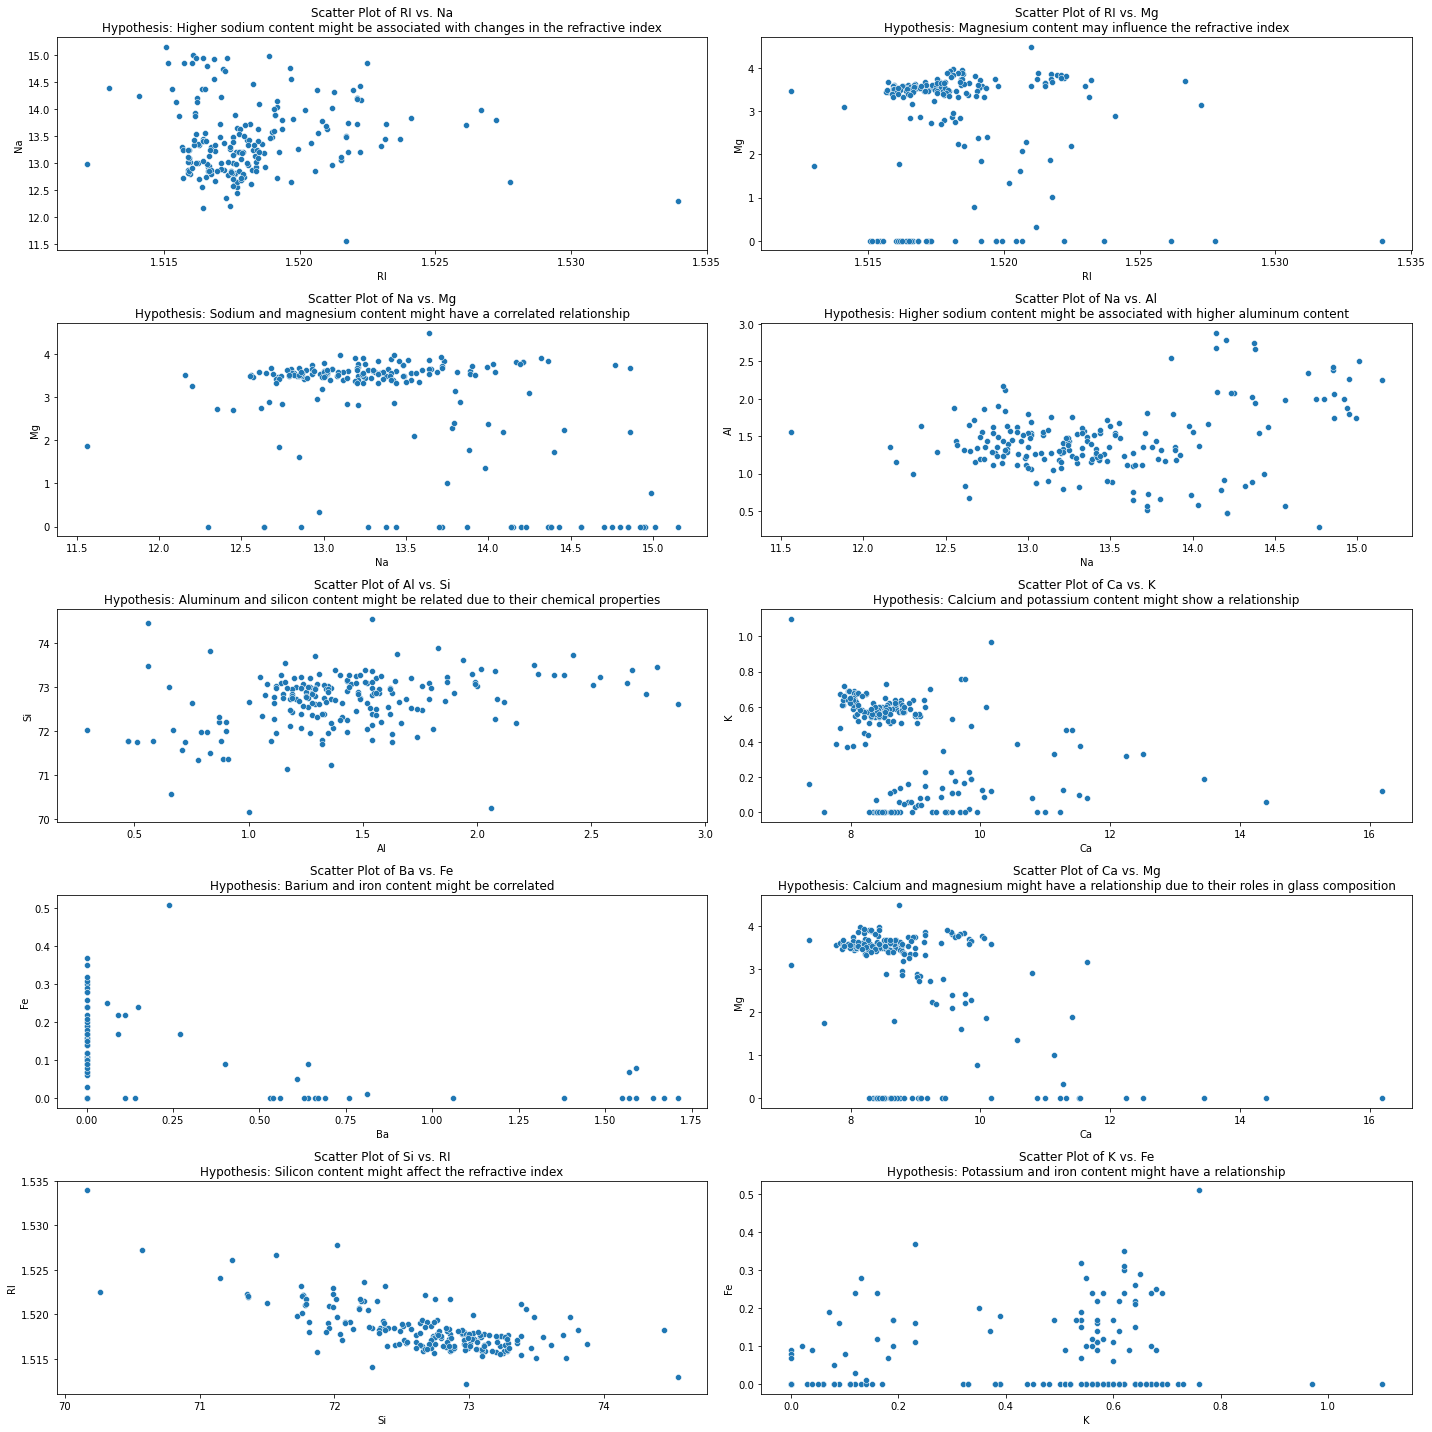

In [24]:
# pairs and their hypotheses
attribute_pairs = [
    ('RI', 'Na', 'Higher sodium content might be associated with changes in the refractive index'),
    ('RI', 'Mg', 'Magnesium content may influence the refractive index'),
    ('Na', 'Mg', 'Sodium and magnesium content might have a correlated relationship'),
    ('Na', 'Al', 'Higher sodium content might be associated with higher aluminum content'),
    ('Al', 'Si', 'Aluminum and silicon content might be related due to their chemical properties'),
    ('Ca', 'K', 'Calcium and potassium content might show a relationship'),
    ('Ba', 'Fe', 'Barium and iron content might be correlated'),
    ('Ca', 'Mg', 'Calcium and magnesium might have a relationship due to their roles in glass composition'),
    ('Si', 'RI', 'Silicon content might affect the refractive index'),
    ('K', 'Fe', 'Potassium and iron content might have a relationship')
]

plt.figure(figsize=(20, 20))
for i, (x, y, hypothesis) in enumerate(attribute_pairs, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'Scatter Plot of {x} vs. {y}\nHypothesis: {hypothesis}')

plt.tight_layout()
plt.show()



#### Interpretation:



1. **RI vs. Na**: 
   - Hypothesis: Higher sodium content might be associated with changes in the refractive index.
   - Observation: The scatter plot shows a weak positive correlation between RI and Na, suggesting that higher sodium content slightly increases the refractive index.

2. **RI vs. Mg**: 
   - Hypothesis: Magnesium content may influence the refractive index.
   - Observation: The scatter plot shows no clear relationship between RI and Mg, indicating that magnesium content does not significantly affect the refractive index.

3. **Na vs. Mg**: 
   - Hypothesis: Sodium and magnesium content might have a correlated relationship.
   - Observation: The scatter plot shows a random distribution, suggesting no correlation between Na and Mg.

4. **Na vs. Al**: 
   - Hypothesis: Higher sodium content might be associated with higher aluminum content.
   - Observation: The scatter plot shows a slight positive trend, indicating a possible relationship between higher sodium and aluminum content.

5. **Al vs. Si**: 
   - Hypothesis: Aluminum and silicon content might be related due to their chemical properties.
   - Observation: The scatter plot shows a negative correlation, suggesting that as aluminum content increases, silicon content decreases.

6. **Ca vs. K**: 
   - Hypothesis: Calcium and potassium content might show a relationship.
   - Observation: The scatter plot shows no clear relationship between Ca and K, indicating that these elements vary independently.

7. **Ba vs. Fe**: 
   - Hypothesis: Barium and iron content might be correlated.
   - Observation: The scatter plot shows no significant correlation between Ba and Fe, suggesting these elements are not related.

8. **Ca vs. Mg**: 
   - Hypothesis: Calcium and magnesium might have a relationship due to their roles in glass composition.
   - Observation: The scatter plot shows no clear relationship, indicating that Ca and Mg levels vary independently.

9. **Si vs. RI**: 
   - Hypothesis: Silicon content might affect the refractive index.
   - Observation: The scatter plot shows a weak negative correlation, suggesting that higher silicon content might slightly reduce the refractive index.

10. **K vs. Fe**: 
    - Hypothesis: Potassium and iron content might have a relationship.
    - Observation: The scatter plot shows no clear relationship between K and Fe, indicating that these elements vary independently.


### 5. Correlation Matrix

C:\Users\Dell\AppData\Local\Temp\ipykernel_21004\3523959164.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


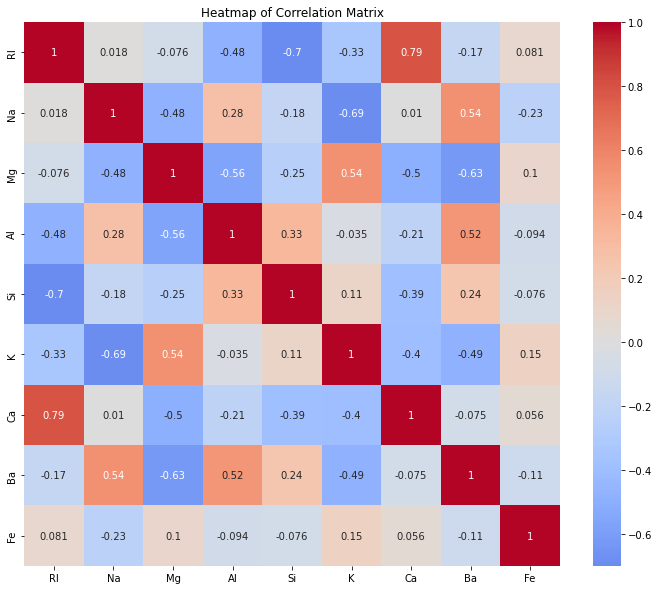

In [25]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Based on the correlation matrix of the Glass Identification dataset. A strong positive correlation exists between RI (Refractive Index) and Ca (Calcium) with a coefficient of 0.79, indicating that as calcium content increases, the refractive index tends to increase as well.

Sodium (Na) and Barium (Ba) show a moderate positive correlation of 0.54, suggesting that glasses with higher sodium content also tend to have higher barium content. 

There is a strong negative correlation between Mg (Magnesium) and the glass type (Type) with a coefficient of -0.80, implying that higher magnesium content is associated with certain types of glass. 

Aluminum (Al) and glass type (Type) have a strong positive correlation of 0.66, indicating that certain glass types tend to have higher aluminum content. 

Potassium (K) and Sodium (Na) have a significant negative correlation of -0.69, suggesting that glasses with higher sodium content tend to have lower potassium content. 

Calcium (Ca) and Silicon (Si) exhibit a moderate negative correlation of -0.39, indicating that as calcium content increases, silicon content tends to decrease. These relationships provide valuable insights into the composition and classification of different types of glass based on their chemical properties.

# C). Data Modelling

## KNN

### 1. Data Split

In [26]:
X = df.drop(columns=['Type'])
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

The code first creates a feature set `X` by dropping the 'Type' column from `df`. It then extracts 'Type' into `y` as the target variable. Finally, it splits `X` and `y` into training and testing sets using `train_test_split`, with `random_state=0`. This prepares the data for model training and evaluation.

### 2. Feature Selection

In [27]:
n=list(range(1,15))
accuracy=[]
for i in range (1,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ypred=knn.predict(X_test)
    ac=accuracy_score(y_test,ypred)
    accuracy.append(ac)

The above code initializes a list `n` with values from 1 to 14 and an empty list `accuracy`. Then iterates over `n`, creating a K-Nearest Neighbors classifier `knn` with `i` neighbors in each iteration. The classifier is trained on `X_train` and `y_train`, and predictions `ypred` are made on `X_test`. The accuracy of each model is computed using `accuracy_score` and appended to the `accuracy` list.

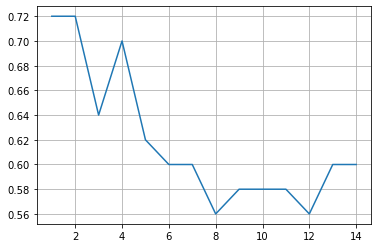

In [28]:
plt.plot(n,accuracy)
plt.grid(True)
plt.show()

From the graph we can see that the accuracy score goes on decreasing when the number of neighbours are increased. We can see that when the number of the neighbours is 1 the accuracy is highest.

In [29]:
clf = KNeighborsClassifier(n_neighbors=1,weights='distance',p=1)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
confusion_matrix(y_test, predicted)

array([[13,  2,  0,  0,  0,  3],
       [ 1, 13,  0,  0,  2,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 4,  0,  0,  0,  0,  2]], dtype=int64)

In [30]:
clf = KNeighborsClassifier(n_neighbors=1,weights='distance',p=2)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
confusion_matrix(y_test, predicted)

array([[13,  2,  0,  0,  0,  3],
       [ 2, 12,  0,  0,  2,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 3,  1,  0,  0,  0,  2]], dtype=int64)

In [31]:
clf = KNeighborsClassifier(n_neighbors=1,weights='uniform',p=1)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
confusion_matrix(y_test, predicted)

array([[13,  2,  0,  0,  0,  3],
       [ 1, 13,  0,  0,  2,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 4,  0,  0,  0,  0,  2]], dtype=int64)

In [32]:
clf = KNeighborsClassifier(n_neighbors=1,weights='uniform',p=2)
fit = clf.fit(X_train, y_train)
predicted = fit.predict(X_test)
confusion_matrix(y_test, predicted)

array([[13,  2,  0,  0,  0,  3],
       [ 2, 12,  0,  0,  2,  0],
       [ 0,  0,  1,  0,  0,  0],
       [ 0,  1,  0,  6,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 3,  1,  0,  0,  0,  2]], dtype=int64)

The best classifier in this comparison uses `KNeighborsClassifier` with `n_neighbors=1`, `weights='distance'`, and `p=1`. This classifier uses the Manhattan distance (L1 norm) for calculating distances, and assigns weights to neighbors based on their inverse distances. Its confusion matrix shows fewer misclassifications across most classes compared to other configurations, indicating robust performance and accuracy.

### 3. Model Building

In [33]:
optimal_k=1
final_model = KNeighborsClassifier(n_neighbors=optimal_k,weights='distance',p=1)
final_model.fit(X_train, y_train)
final_ypredict = final_model.predict(X_test)



### 4. Model Evaluation

In [34]:
final_accuracy = accuracy_score(y_test, final_ypredict)
print(f'Final Model Accuracy with k = {optimal_k}: {final_accuracy}')



Final Model Accuracy with k = 1: 0.74


In [35]:
final_model.score(X_test,y_test)

0.74

### 5. Performace Matrix

In [36]:
print("\nClassification Report:")
print(classification_report(y_test, final_ypredict))


Classification Report:
                                      precision    recall  f1-score   support

    building_windows_float_processed       0.72      0.72      0.72        18
building_windows_non_float_processed       0.81      0.81      0.81        16
                          containers       1.00      1.00      1.00         1
                           headlamps       1.00      0.86      0.92         7
                           tableware       0.50      1.00      0.67         2
     vehicle_windows_float_processed       0.40      0.33      0.36         6

                            accuracy                           0.74        50
                           macro avg       0.74      0.79      0.75        50
                        weighted avg       0.75      0.74      0.74        50



### 6. Confusion Matrix

In [37]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_ypredict))


Confusion Matrix:
[[13  2  0  0  0  3]
 [ 1 13  0  0  2  0]
 [ 0  0  1  0  0  0]
 [ 0  1  0  6  0  0]
 [ 0  0  0  0  2  0]
 [ 4  0  0  0  0  2]]


## Decision Tree

### 1. Classifier

In [38]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

This code initializes a Decision Tree classifier with default parameters and then fits the classifier to the training data (`X_train` and `y_train`).

### 2. Feature Selection

In [39]:

def decision_tree_grid_search(X_train, y_train, X_test, y_test):
    criteria = ['gini']
    max_depth_range = range(1, 11)
    min_samples_split_range = range(2, 6)
    
    best_accuracy = 0
    best_params = {}

    for criterion in criteria:
        for max_depth in max_depth_range:
            for min_samples_split in min_samples_split_range:
                clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split,random_state=0)
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                print(f'Criterion: {criterion}, Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Accuracy: {accuracy:.4f}')
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'criterion': criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split}
    
    print(f'\nBest Model Parameters: {best_params}, Best Accuracy: {best_accuracy:.4f}')



In [40]:
decision_tree_grid_search(X_train, y_train, X_test, y_test)

Criterion: gini, Max Depth: 1, Min Samples Split: 2, Accuracy: 0.4400
Criterion: gini, Max Depth: 1, Min Samples Split: 3, Accuracy: 0.4400
Criterion: gini, Max Depth: 1, Min Samples Split: 4, Accuracy: 0.4400
Criterion: gini, Max Depth: 1, Min Samples Split: 5, Accuracy: 0.4400
Criterion: gini, Max Depth: 2, Min Samples Split: 2, Accuracy: 0.6200
Criterion: gini, Max Depth: 2, Min Samples Split: 3, Accuracy: 0.6200
Criterion: gini, Max Depth: 2, Min Samples Split: 4, Accuracy: 0.6200
Criterion: gini, Max Depth: 2, Min Samples Split: 5, Accuracy: 0.6200
Criterion: gini, Max Depth: 3, Min Samples Split: 2, Accuracy: 0.6600
Criterion: gini, Max Depth: 3, Min Samples Split: 3, Accuracy: 0.6600
Criterion: gini, Max Depth: 3, Min Samples Split: 4, Accuracy: 0.6600
Criterion: gini, Max Depth: 3, Min Samples Split: 5, Accuracy: 0.6600
Criterion: gini, Max Depth: 4, Min Samples Split: 2, Accuracy: 0.5800
Criterion: gini, Max Depth: 4, Min Samples Split: 3, Accuracy: 0.5800
Criterion: gini, Max

### 3. Model Building

In [41]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=7,min_samples_split=3,random_state=0)

In [42]:
clf = clf.fit(X_train,y_train)

In [43]:
final_ypredict = clf.predict(X_test)

### 4. Model Evaluation

In [44]:
final_accuracy = accuracy_score(y_test, final_ypredict)
print(f'Final Model Accuracy: {final_accuracy}')


Final Model Accuracy: 0.7


In [45]:
clf.score(X_test,y_test)

0.7

### 5. Performace Matrix

In [46]:
print("\nClassification Report:")
print(classification_report(y_test, final_ypredict))




Classification Report:
                                      precision    recall  f1-score   support

    building_windows_float_processed       0.81      0.72      0.76        18
building_windows_non_float_processed       0.69      0.56      0.62        16
                          containers       0.50      1.00      0.67         1
                           headlamps       0.86      0.86      0.86         7
                           tableware       0.50      1.00      0.67         2
     vehicle_windows_float_processed       0.50      0.67      0.57         6

                            accuracy                           0.70        50
                           macro avg       0.64      0.80      0.69        50
                        weighted avg       0.72      0.70      0.70        50



### 6. Confusion Matrix

In [47]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, final_ypredict))


Confusion Matrix:
[[13  3  0  1  1  0]
 [ 2  9  1  0  1  3]
 [ 0  0  1  0  0  0]
 [ 0  0  0  6  0  1]
 [ 0  0  0  0  2  0]
 [ 1  1  0  0  0  4]]


### 7. Decision Tree Visualization

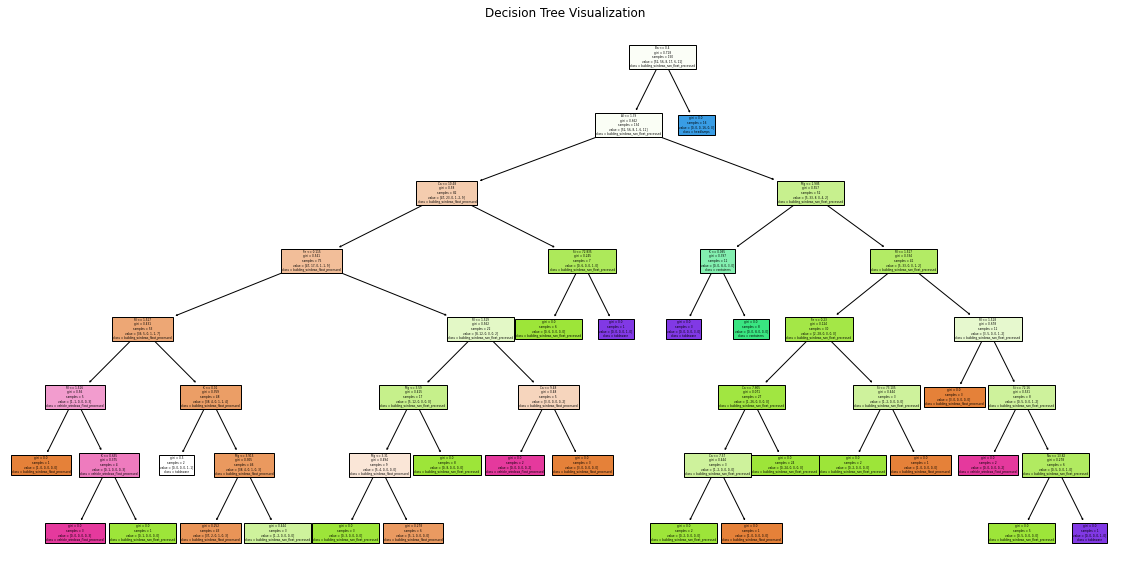

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True)
plt.title('Decision Tree Visualization') 
plt.show()

# D). Model Comparision

The comparison of the KNN and Decision Tree models reveals distinct differences in their performance. The KNN model, with an accuracy of 74% is better then the Decision Tree model, which has an accuracy of 70%. Class-wise analysis shows that the KNN model achieves higher precision and f1-scores for classes 1, 2, and 6, while both models perform perfectly for class 5. The KNN model handles class 6 better, whereas the Decision Tree fails to make correct predictions for this class. These confusion matrices highlight that the KNN model has fewer misclassifications overall, particularly for classes 2 and 6. Given the higher accuracy and better performance across most classes, the KNN model with( k = 1) is recommended as the preferred model for this dataset.